### latihan projek Linear regression

#### y = mx + b + e
y = dependent variable

m = slope dari garis (persamaan diatas merupakan sebuah garis)

x = independent variable

b = intercept

e = error

In [6]:
import pandas as pd
# hanya menggunakan colom hoursepower dan price
df = pd.read_csv('E:\\data.csv',usecols=['horsepower', 'price'])
df

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0
...,...,...
195,114.0,16845.0
196,160.0,19045.0
197,134.0,21485.0
198,106.0,22470.0


In [9]:
df.shape

(200, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [15]:
df.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [17]:
#cek data missing values
df.isnull().sum()

horsepower    0
price         0
dtype: int64

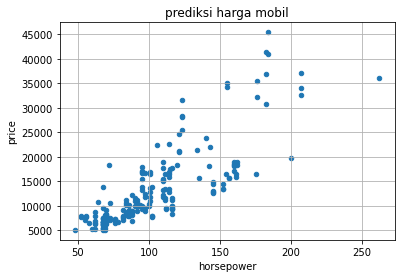

In [95]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='horsepower', y='price')

plt.title('prediksi harga mobil')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.grid(True)
plt.show()

-Dari scatter plot dapat dilihat secara kasat mata bahwa data memiliki korelasi positif yang cukup signifikan.

-Hal ini berarti dengan bertambahnya nilai dari horsepower maka nilai price pun akan bertambah.

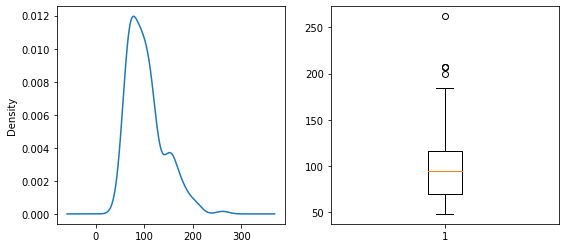

In [25]:
#Melakukan Exploratory Data Analysis (EDA)
#dan menemukan insights dari data.
#Univariate analysis horsepower.
#Melihat distribusi dari horsepower.

f = plt.figure(figsize=(9,4))
f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

result insights

-Dapat dilihat bahwa mean dan median dari horsepower terpusat di sekitar nilai 100
-Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi) karena memiliki whiskers boxplot yang panjang
-3 outliers data yang bisa dilihat di boxplot

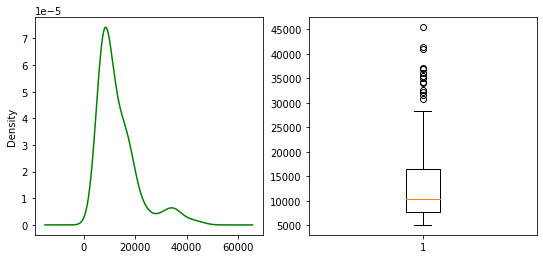

In [26]:
#Univariate analysis price.
#Melihat distribusi dari price.

f = plt.figure(figsize=(9,4))
f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

result insights

-Mean dan median dari horsepower terpusat di sekitar nilai 10000.

-Distribusinya lebih ke right skew dan persebaran data kurang merata (memiliki standard deviasi yang tinggi).

-Data memiliki banyak outliers jika dibandingkan dengan horsepower.

In [27]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi.
df.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


### Setelah kita mengetahui karakteristik dari data kita, maka tahapan selanjutnya adalah Modelling.

In [84]:
# create variable x dan y.
import numpy as np

x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

#print(f'x: {x}')
#print(f'y: {y}')

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [89]:
#training simple linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [91]:
print(model.coef_)
print(model.intercept_)

[[164.55684359]]
[-3927.56361989]


In [92]:
model.score(x_test, y_test)

0.6492373545819949

Model kita mendapatkan accuracy score sebesar 64,92%

Text(0.5, 1.0, 'Plot Horsepower vs Price')

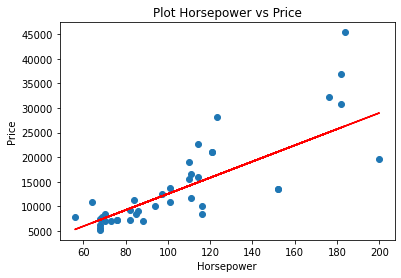

In [94]:
y_prediksi = model.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

Garis merah merupakan Regression Line dari model yang telah dibuat sebelumnya.

In [96]:
#Prediksi harga mobil dengan horsepower 100.
model.predict([[100]])

array([[12528.1207393]])

In [98]:
#Prediksi harga mobil dengan horsepower 150.
model.predict([[150]])

array([[20755.9629189]])

In [99]:
#Prediksi harga mobil dengan horsepower 200.
model.predict([[200]])

array([[28983.8050985]])

In [100]:
#Prediksi harga mobil dengan horsepower 400.
model.predict([[400]])

array([[61895.17381688]])